In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
from scipy.fft import fft
from scipy.signal import spectrogram
import soundfile as sf

In [2]:
audio_file_path = '/content/Recording.wav'
waveforms, sampling_rate = librosa.load(audio_file_path, sr=None)
print(f"Audio Sampling Rate: {sampling_rate} Hz")

Audio Sampling Rate: 48000 Hz


In [3]:
amplitude_range = np.max(waveforms) - np.min(waveforms)
print(f"Amplitude Range: {amplitude_range}")

Amplitude Range: 0.292144775390625


In [4]:
audio_data, sampling_rate = sf.read(audio_file_path)
bit_depth = audio_data.dtype.itemsize
print(f"Bit depth: {bit_depth} bits")

Bit depth: 8 bits


### Waveform in Time Domain

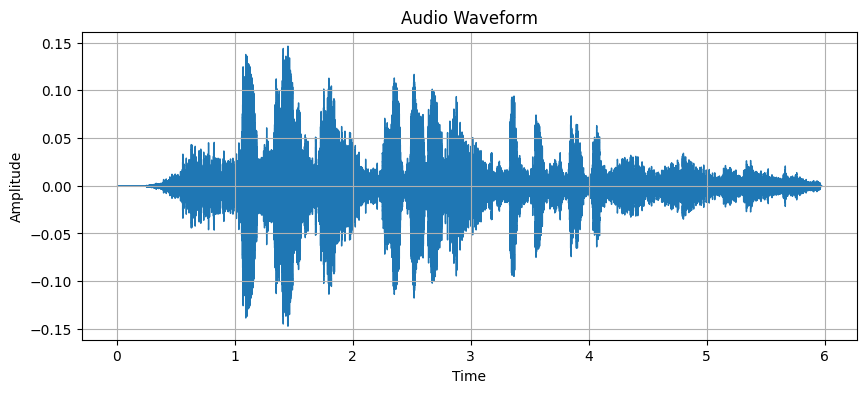

In [5]:
plt.figure(figsize=(10, 4))

librosa.display.waveshow(waveforms, sr=sampling_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Audio Waveform")
plt.grid()
plt.show()

### Waveform in Frequency Domain

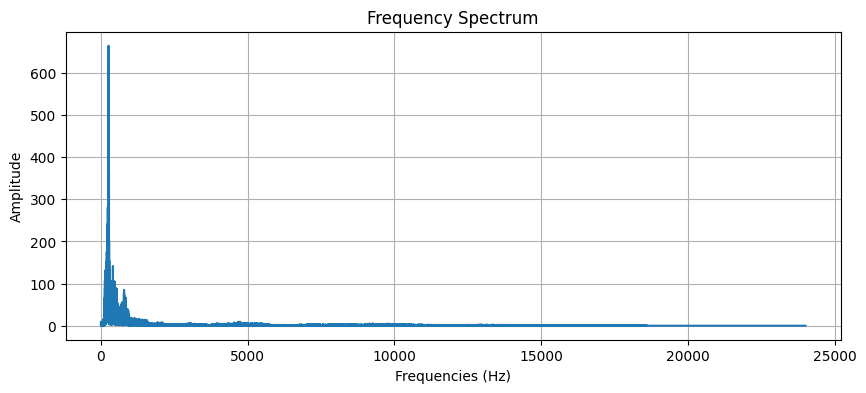

In [6]:
spectrum = fft(waveforms)

frequencies = np.fft.fftfreq(len(spectrum), 1/sampling_rate)
plt.figure(figsize=(10, 4))
plt.plot(frequencies[:len(frequencies)//2], np.abs(spectrum[:len(spectrum)//2]))
plt.xlabel("Frequencies (Hz)")
plt.ylabel("Amplitude")
plt.grid()
plt.title("Frequency Spectrum")
plt.show()

### Spectrogram

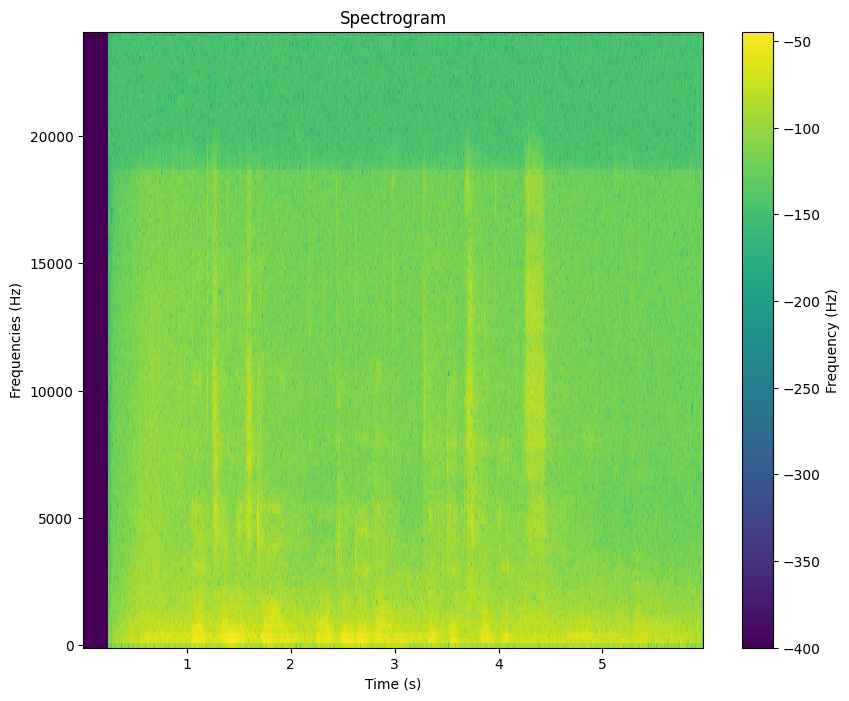

In [8]:
epsilon = 1e-40 # to avoid division by zero

f, t, Sxx = spectrogram(waveforms, fs=sampling_rate)

plt.figure(figsize=(10, 8))
plt.pcolormesh(t, f, 10*np.log10(Sxx + epsilon))
plt.colorbar(label="Frequency (Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Frequencies (Hz)")
plt.title("Spectrogram")
plt.show()

### Example: Dog Barking Audio

In [12]:
audio_file_path = "/content/dog-barking.mp3"

waveforms, sampling_rate = librosa.load(audio_file_path, sr=None)
print(f"Sampling Rate: {sampling_rate} Hz")

Sampling Rate: 24000 Hz


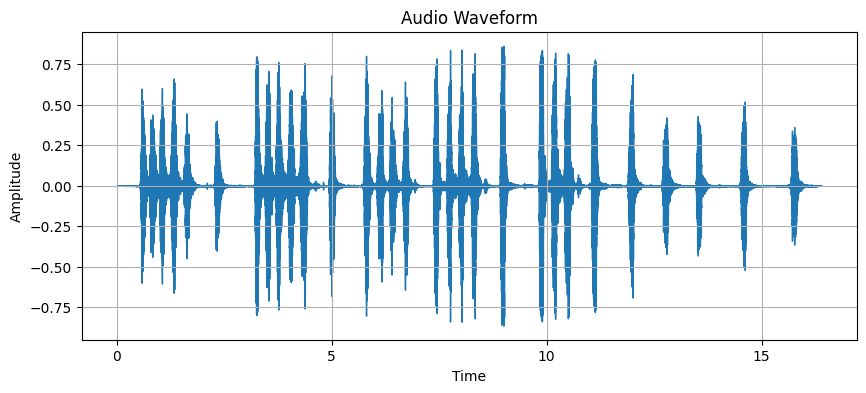

In [13]:
plt.figure(figsize=(10, 4))

librosa.display.waveshow(waveforms, sr=sampling_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Audio Waveform")
plt.grid()
plt.show()

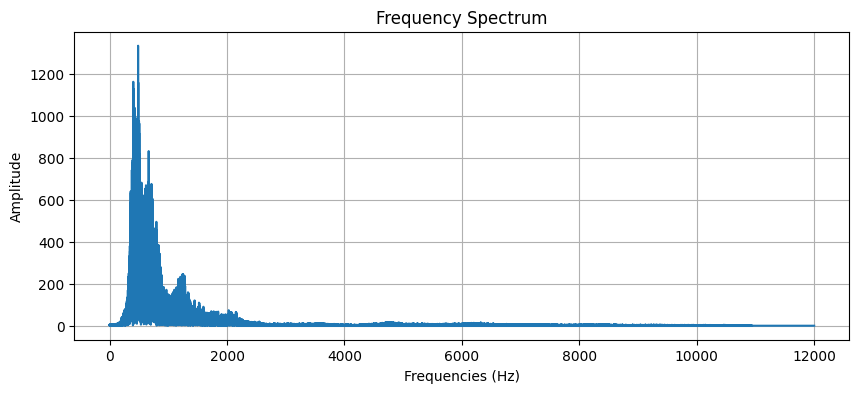

In [14]:
spectrum = fft(waveforms)

frequencies = np.fft.fftfreq(len(spectrum), 1/sampling_rate)
plt.figure(figsize=(10, 4))
plt.plot(frequencies[:len(frequencies)//2], np.abs(spectrum[:len(spectrum)//2]))
plt.xlabel("Frequencies (Hz)")
plt.ylabel("Amplitude")
plt.grid()
plt.title("Frequency Spectrum")
plt.show()

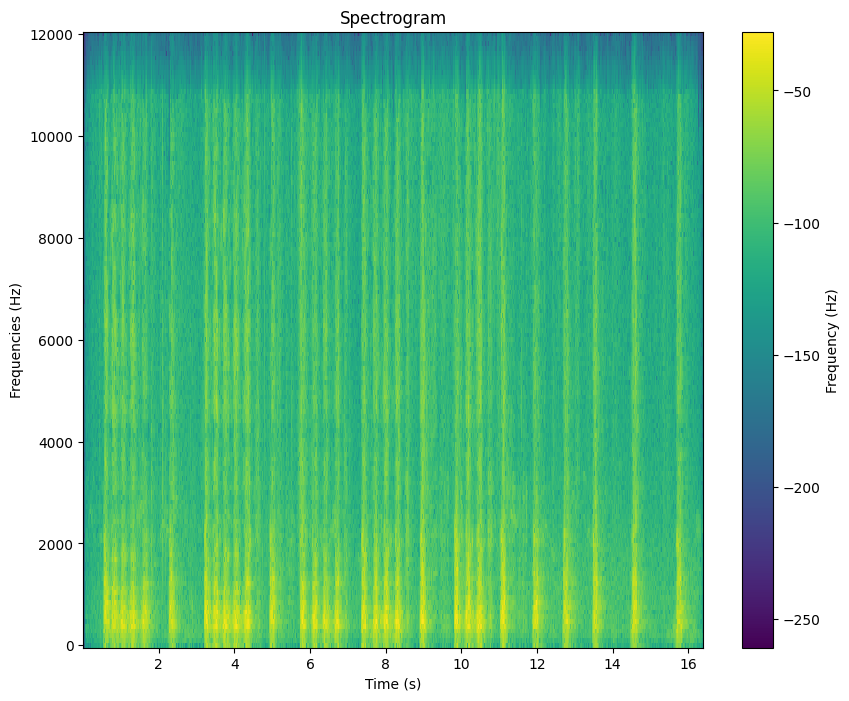

In [19]:
epsilon = 1e-40 # to avoid division by zero

f, t, Sxx = spectrogram(waveforms, fs=sampling_rate)

plt.figure(figsize=(10, 8))
plt.pcolormesh(t, f, 10*np.log10(Sxx + epsilon))
plt.colorbar(label="Frequency (Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Frequencies (Hz)")
plt.title("Spectrogram")
plt.show()

The colorbar represents how strong each frequency component is at each moment in time.